In [2]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import torch

In [3]:
df = pd.read_csv('C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\Code\\Preprocessing\\cleaned_final_label')
df

,text,label,stemmed_text,label_angka
0,kunjungan prabowo untuk meresmikan menyerahkan...,Sumber Daya Alam,kunjung prabowo untuk resmi serah proyek bantu...,5
1,anies tepuk tangan meriah jadi rektor mewajibk...,Politik,anies tepuk tangan riah jadi rektor wajib mata...,0
2,emng bener sih pendukung anies juga pendukung ...,Demografi,emng bener sih dukung anies juga dukung prabow...,6
3,sewaktu anies bersikap kritis kinerja pak prab...,Politik,waktu anies sikap kritis kerja pak prabowo ang...,0
4,anies baswedan harap asn termasuk tni polri pe...,Politik,anies baswedan harap asn masuk tni polri pegan...,0
...,...,...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kekira...,Politik,ngeliat debat kemaren pas prabowo kicep kira k...,0
4579,masyarakat yakin prabowo gibran memiliki visi ...,Politik,masyarakat yakin prabowo gibran milik visi jal...,0
4580,imo both are irrational but satu jauh lebih ir...,Ekonomi,imo both are irrational but satu jauh lebih ir...,4
4581,look at that pak ganjar sudah berkecimpung lgi...,Pertahanan dan Keamanan,look at that pak ganjar sudah kecimpung lgisla...,3


In [4]:
df = df.drop(columns=['text', 'label'])
df

,stemmed_text,label_angka
0,kunjung prabowo untuk resmi serah proyek bantu...,5
1,anies tepuk tangan riah jadi rektor wajib mata...,0
2,emng bener sih dukung anies juga dukung prabow...,6
3,waktu anies sikap kritis kerja pak prabowo ang...,0
4,anies baswedan harap asn masuk tni polri pegan...,0
...,...,...
4578,ngeliat debat kemaren pas prabowo kicep kira k...,0
4579,masyarakat yakin prabowo gibran milik visi jal...,0
4580,imo both are irrational but satu jauh lebih ir...,4
4581,look at that pak ganjar sudah kecimpung lgisla...,3


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score


# Inisialisasi tokenizer dan model
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=8)  # Sesuaikan num_labels sesuai dengan jumlah kelas

# Tokenisasi teks dan integrasi label
def preprocess_function(examples):
    tokenized_inputs = tokenizer(examples['stemmed_text'], padding="max_length", truncation=True, max_length=128)
    tokenized_inputs["label"] = examples["label_angka"]
    return tokenized_inputs

# Tokenisasi teks dan integrasi label
tokenized_datasets = df.apply(preprocess_function, axis=1).tolist()

# Pisahkan dataset menjadi data latih dan evaluasi
train_dataset, eval_dataset = train_test_split(tokenized_datasets, test_size=0.2, random_state=42)

# Fungsi untuk menghitung metrik (contoh: akurasi)
def compute_metrics(pred):
    predictions = pred.predictions.argmax(-1)
    return {"accuracy": accuracy_score(pred.label_ids, predictions)}

# Konfigurasi argument pelatihan
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",   
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

eval_results = trainer.evaluate(eval_dataset)
print(eval_results)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/690 [00:00<?, ?it/s]

{'loss': 1.9973, 'grad_norm': 40.481136322021484, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.04}
{'loss': 1.9374, 'grad_norm': 8.82144546508789, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.09}
{'loss': 1.7665, 'grad_norm': 6.890314102172852, 'learning_rate': 3e-06, 'epoch': 0.13}
{'loss': 1.6432, 'grad_norm': 5.813897132873535, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.17}
{'loss': 1.351, 'grad_norm': 4.709176540374756, 'learning_rate': 5e-06, 'epoch': 0.22}
{'loss': 1.3297, 'grad_norm': 5.6605424880981445, 'learning_rate': 6e-06, 'epoch': 0.26}
{'loss': 1.2075, 'grad_norm': 2.9042816162109375, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.3}
{'loss': 1.3101, 'grad_norm': 4.031404972076416, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.35}
{'loss': 1.4352, 'grad_norm': 4.744176387786865, 'learning_rate': 9e-06, 'epoch': 0.39}
{'loss': 1.2955, 'grad_norm': 4.075107097625732, 'learning_rate': 1e-05, 'epoch': 0.43}
{'loss': 1.2184, 'grad_norm': 5.258985

  0%|          | 0/58 [00:00<?, ?it/s]

{'eval_loss': 1.164446473121643, 'eval_accuracy': 0.6608505997818975, 'eval_runtime': 112.6467, 'eval_samples_per_second': 8.14, 'eval_steps_per_second': 0.515, 'epoch': 1.0}
{'loss': 1.2781, 'grad_norm': 9.097124099731445, 'learning_rate': 2.4e-05, 'epoch': 1.04}
{'loss': 1.0466, 'grad_norm': 10.985031127929688, 'learning_rate': 2.5e-05, 'epoch': 1.09}
{'loss': 1.0026, 'grad_norm': 8.687885284423828, 'learning_rate': 2.6000000000000002e-05, 'epoch': 1.13}
{'loss': 0.9333, 'grad_norm': 13.850483894348145, 'learning_rate': 2.7000000000000002e-05, 'epoch': 1.17}
{'loss': 0.9299, 'grad_norm': 9.254494667053223, 'learning_rate': 2.8000000000000003e-05, 'epoch': 1.22}
{'loss': 0.9922, 'grad_norm': 12.892821311950684, 'learning_rate': 2.9e-05, 'epoch': 1.26}
{'loss': 0.9861, 'grad_norm': 12.844449996948242, 'learning_rate': 3e-05, 'epoch': 1.3}
{'loss': 1.2388, 'grad_norm': 6.70072078704834, 'learning_rate': 3.1e-05, 'epoch': 1.35}
{'loss': 1.1713, 'grad_norm': 6.59921407699585, 'learning_ra

  0%|          | 0/58 [00:00<?, ?it/s]

{'eval_loss': 0.9367969036102295, 'eval_accuracy': 0.7241003271537623, 'eval_runtime': 111.7523, 'eval_samples_per_second': 8.206, 'eval_steps_per_second': 0.519, 'epoch': 2.0}
{'loss': 0.9134, 'grad_norm': 10.136847496032715, 'learning_rate': 4.7e-05, 'epoch': 2.04}
{'loss': 0.828, 'grad_norm': 13.61751651763916, 'learning_rate': 4.8e-05, 'epoch': 2.09}
{'loss': 0.9626, 'grad_norm': 5.64112663269043, 'learning_rate': 4.9e-05, 'epoch': 2.13}
{'loss': 0.7646, 'grad_norm': 12.391725540161133, 'learning_rate': 5e-05, 'epoch': 2.17}
{'loss': 0.8035, 'grad_norm': 10.178544044494629, 'learning_rate': 4.736842105263158e-05, 'epoch': 2.22}
{'loss': 0.8039, 'grad_norm': 22.211904525756836, 'learning_rate': 4.473684210526316e-05, 'epoch': 2.26}
{'loss': 0.7868, 'grad_norm': 16.28048324584961, 'learning_rate': 4.210526315789474e-05, 'epoch': 2.3}
{'loss': 0.7596, 'grad_norm': 13.477973937988281, 'learning_rate': 3.9473684210526316e-05, 'epoch': 2.35}
{'loss': 1.0663, 'grad_norm': 8.10263919830322

  0%|          | 0/58 [00:00<?, ?it/s]

{'eval_loss': 0.849016547203064, 'eval_accuracy': 0.7284623773173392, 'eval_runtime': 120.557, 'eval_samples_per_second': 7.606, 'eval_steps_per_second': 0.481, 'epoch': 3.0}
{'train_runtime': 4814.3728, 'train_samples_per_second': 2.284, 'train_steps_per_second': 0.143, 'train_loss': 1.054599570536959, 'epoch': 3.0}


  0%|          | 0/58 [00:00<?, ?it/s]

{'eval_loss': 0.849016547203064, 'eval_accuracy': 0.7284623773173392, 'eval_runtime': 108.8983, 'eval_samples_per_second': 8.421, 'eval_steps_per_second': 0.533, 'epoch': 3.0}


In [5]:
predictions = trainer.predict(eval_dataset)

# Dapatkan hasil prediksi dalam bentuk label yang diprediksi
predicted_labels = predictions.predictions.argmax(axis=1)

# Ambil label asli dari DataFrame untuk evaluasi
true_labels = [example["label"] for example in eval_dataset]

# Hitung metrik evaluasi secara detail
eval_metrics = compute_metrics(predictions)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

  0%|          | 0/58 [00:00<?, ?it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       594
           1       0.50      0.28      0.36        79
           2       0.69      0.46      0.55        72
           3       0.65      0.52      0.57        64
           4       0.55      0.59      0.57        59
           5       0.56      0.27      0.36        37
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         4

    accuracy                           0.73       917
   macro avg       0.46      0.38      0.41       917
weighted avg       0.70      0.73      0.70       917



c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
print(f'Balanced Accuracy: {balanced_accuracy:.4f}')

Balanced Accuracy: 0.3771


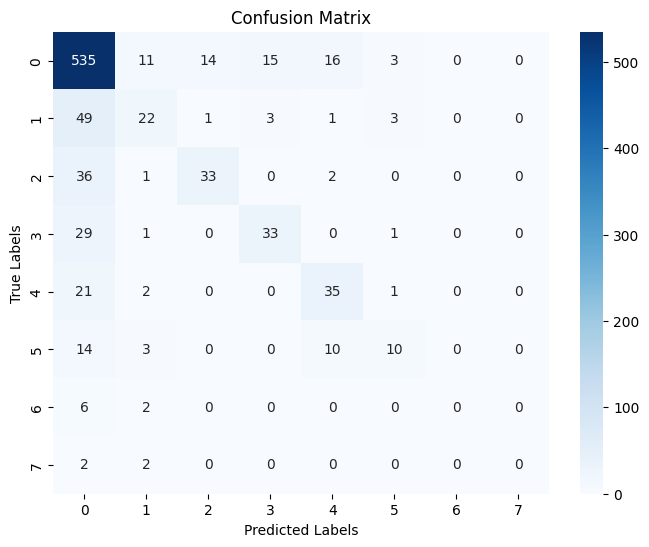

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
import torch

model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=8) 

def preprocess_function(examples):
    tokenized_inputs = tokenizer(examples['stemmed_text'], padding="max_length", truncation=True, max_length=128)
    tokenized_inputs["label"] = examples["label_angka"]
    return tokenized_inputs

# Contoh dataframe (df) Anda
tokenized_datasets = df.apply(preprocess_function, axis=1).tolist()


# Konversi ke DataFrame Pandas jika tokenized_datasets adalah list of dictionaries
df_tokenized = pd.DataFrame(tokenized_datasets)

# Pisahkan dataset menjadi fitur (input) dan label
X = df_tokenized[['input_ids', 'attention_mask']]
y = df_tokenized['label']

# Lakukan oversampling pada dataset latih
oversample = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Gabungkan kembali data yang telah di-resample
train_dataset_resampled = pd.DataFrame({'input_ids': X_resampled[:, 0], 'attention_mask': X_resampled[:, 1], 'label': y_resampled})


# Hitung distribusi kelas untuk menghitung bobot
class_counts = train_dataset_resampled['label'].value_counts().sort_index()
total_samples = len(train_dataset_resampled)
class_weights = torch.tensor([total_samples / (len(class_counts) * count) for count in class_counts], dtype=torch.float)

# Fungsi Loss Weighted Cross Entropy
class WeightedCrossEntropyLoss(torch.nn.Module):
    def __init__(self, weight):
        super().__init__()
        self.weight = weight

    def forward(self, logits, targets):
        return torch.nn.CrossEntropyLoss(weight=self.weight)(logits, targets)

weighted_loss = WeightedCrossEntropyLoss(weight=class_weights)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    # Gunakan weighted_loss sebagai fungsi loss
    # Hati-hati, trainer Transformers menerima fungsi loss PyTorch, bukan nama string
    # Jadi tidak bisa langsung menggunakan "weighted_loss"
    # Sebagai gantinya, gunakan fungsi loss seperti yang ditentukan di bawah
    label_names=["input_ids", "attention_mask", "label"],
    data_collator=None,       
)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from imblearn.over_sampling import RandomOverSampler
X = df['stemmed_text']
y = df['label_angka']

# Apply Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.values.reshape(-1, 1), y)
X_resampled = X_resampled.flatten()

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame({'stemmed_text': X_resampled, 'label_angka': y_resampled})

# Initialize tokenizer and model
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=8)  # Adjust num_labels as needed

# Tokenize text and integrate labels
def preprocess_function(examples):
    tokenized_inputs = tokenizer(examples['stemmed_text'], padding="max_length", truncation=True, max_length=128)
    tokenized_inputs["label"] = examples["label_angka"]
    return tokenized_inputs

# Tokenize and integrate labels
tokenized_datasets = df_resampled.apply(preprocess_function, axis=1).tolist()

# Split the dataset into training and evaluation sets
train_dataset, eval_dataset = train_test_split(tokenized_datasets, test_size=0.2, random_state=42)

# Function to compute metrics (example: accuracy)
def compute_metrics(pred):
    predictions = pred.predictions.argmax(-1)
    return {"accuracy": accuracy_score(pred.label_ids, predictions)}

# Configure training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

eval_results = trainer.evaluate(eval_dataset)
print(eval_results)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from imblearn.over_sampling import SMOTE
import numpy as np
from datasets import Dataset

# Load your dataset
# df = pd.read_csv('your_dataset.csv')
# df should have 'stemmed_text' and 'label_angka' columns

# Initialize tokenizer
model_name = 'bert-base-multilingual-cased'
tokenizer = BertTokenizer.from_pretrained(model_name)

# Tokenize text
def tokenize_function(examples):
    return tokenizer(examples['stemmed_text'], padding='max_length', truncation=True, max_length=128)

# Apply tokenization
tokenized_datasets = df.apply(tokenize_function, axis=1).to_list()

# Extract input_ids and attention_mask
input_ids = [x['input_ids'] for x in tokenized_datasets]
attention_mask = [x['attention_mask'] for x in tokenized_datasets]
labels = df['label_angka'].values

# Apply SMOTE on tokenized inputs
smote = SMOTE(random_state=42)
input_ids_resampled, labels_resampled = smote.fit_resample(np.array(input_ids), labels)
attention_mask_resampled, _ = smote.fit_resample(np.array(attention_mask), labels)

# Convert resampled arrays back to lists
input_ids_resampled = input_ids_resampled.tolist()
attention_mask_resampled = attention_mask_resampled.tolist()

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame({
    'input_ids': input_ids_resampled,
    'attention_mask': attention_mask_resampled,
    'label': labels_resampled
})

# Convert to HuggingFace Dataset
dataset = Dataset.from_pandas(df_resampled)

# Split the dataset into training and evaluation sets
train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split['train']
eval_dataset = train_test_split['test']

# Initialize model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=8)

# Function to compute metrics (example: accuracy)
def compute_metrics(pred):
    predictions = pred.predictions.argmax(-1)
    return {"accuracy": accuracy_score(pred.label_ids, predictions)}

# Configure training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

eval_results = trainer.evaluate(eval_dataset)
print(eval_results)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


  0%|          | 0/3543 [00:00<?, ?it/s]

{'loss': 2.1388, 'grad_norm': 14.493553161621094, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}
{'loss': 2.0897, 'grad_norm': 5.480471611022949, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}
{'loss': 2.1169, 'grad_norm': 3.843621253967285, 'learning_rate': 3e-06, 'epoch': 0.03}
{'loss': 2.0786, 'grad_norm': 4.446925163269043, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.03}
{'loss': 2.0663, 'grad_norm': 4.2843499183654785, 'learning_rate': 5e-06, 'epoch': 0.04}
{'loss': 2.0501, 'grad_norm': 4.557274341583252, 'learning_rate': 6e-06, 'epoch': 0.05}
{'loss': 2.0175, 'grad_norm': 4.913768291473389, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.06}
{'loss': 2.0023, 'grad_norm': 6.008302688598633, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.07}
{'loss': 1.9403, 'grad_norm': 6.594961166381836, 'learning_rate': 9e-06, 'epoch': 0.08}
{'loss': 1.9007, 'grad_norm': 7.096219539642334, 'learning_rate': 1e-05, 'epoch': 0.08}
{'loss': 1.8482, 'grad_norm': 6.0667

  0%|          | 0/296 [00:00<?, ?it/s]

{'eval_loss': 1.4978975057601929, 'eval_accuracy': 0.4235817104149026, 'eval_runtime': 523.4211, 'eval_samples_per_second': 9.025, 'eval_steps_per_second': 0.566, 'epoch': 1.0}
{'loss': 1.4815, 'grad_norm': 7.2633209228515625, 'learning_rate': 3.866250410778837e-05, 'epoch': 1.01}
{'loss': 1.526, 'grad_norm': 5.895848751068115, 'learning_rate': 3.8498192573118635e-05, 'epoch': 1.02}
{'loss': 1.5642, 'grad_norm': 5.842796802520752, 'learning_rate': 3.8333881038448896e-05, 'epoch': 1.02}
{'loss': 1.4782, 'grad_norm': 5.940886497497559, 'learning_rate': 3.816956950377917e-05, 'epoch': 1.03}
{'loss': 1.5, 'grad_norm': 9.649316787719727, 'learning_rate': 3.800525796910943e-05, 'epoch': 1.04}
{'loss': 1.4367, 'grad_norm': 4.214173316955566, 'learning_rate': 3.78409464344397e-05, 'epoch': 1.05}
{'loss': 1.4285, 'grad_norm': 12.219369888305664, 'learning_rate': 3.767663489976996e-05, 'epoch': 1.06}
{'loss': 1.5586, 'grad_norm': 5.498869895935059, 'learning_rate': 3.751232336510023e-05, 'epoch'

  0%|          | 0/296 [00:00<?, ?it/s]

{'eval_loss': 1.3478307723999023, 'eval_accuracy': 0.4826418289585097, 'eval_runtime': 512.0893, 'eval_samples_per_second': 9.225, 'eval_steps_per_second': 0.578, 'epoch': 2.0}
{'loss': 1.2126, 'grad_norm': 6.093929767608643, 'learning_rate': 1.9273743016759776e-05, 'epoch': 2.01}
{'loss': 1.1416, 'grad_norm': 13.344366073608398, 'learning_rate': 1.9109431482090044e-05, 'epoch': 2.02}
{'loss': 1.0812, 'grad_norm': 7.040659427642822, 'learning_rate': 1.894511994742031e-05, 'epoch': 2.02}
{'loss': 1.2737, 'grad_norm': 9.638838768005371, 'learning_rate': 1.8780808412750576e-05, 'epoch': 2.03}
{'loss': 1.1334, 'grad_norm': 20.114269256591797, 'learning_rate': 1.861649687808084e-05, 'epoch': 2.04}
{'loss': 1.0562, 'grad_norm': 9.686681747436523, 'learning_rate': 1.845218534341111e-05, 'epoch': 2.05}
{'loss': 1.1839, 'grad_norm': 10.411710739135742, 'learning_rate': 1.8287873808741374e-05, 'epoch': 2.06}
{'loss': 1.1533, 'grad_norm': 11.530312538146973, 'learning_rate': 1.812356227407164e-05

  0%|          | 0/296 [00:00<?, ?it/s]

{'eval_loss': 1.3144930601119995, 'eval_accuracy': 0.5347163420829806, 'eval_runtime': 697.6385, 'eval_samples_per_second': 6.771, 'eval_steps_per_second': 0.424, 'epoch': 3.0}
{'train_runtime': 22782.8805, 'train_samples_per_second': 2.488, 'train_steps_per_second': 0.156, 'train_loss': 1.3955208094416787, 'epoch': 3.0}


  0%|          | 0/296 [00:00<?, ?it/s]

{'eval_loss': 1.3144930601119995, 'eval_accuracy': 0.5347163420829806, 'eval_runtime': 717.5734, 'eval_samples_per_second': 6.583, 'eval_steps_per_second': 0.413, 'epoch': 3.0}


In [7]:
predictions = trainer.predict(eval_dataset)

# Dapatkan hasil prediksi dalam bentuk label yang diprediksi
predicted_labels = predictions.predictions.argmax(axis=1)

# Ambil label asli dari DataFrame untuk evaluasi
true_labels = [example["label"] for example in eval_dataset]

# Hitung metrik evaluasi secara detail
eval_metrics = compute_metrics(predictions)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

  0%|          | 0/296 [00:00<?, ?it/s]


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       574
           1       0.31      0.36      0.33       582
           2       0.81      0.38      0.52       611
           3       0.55      0.41      0.47       617
           4       0.65      0.45      0.53       618
           5       0.34      0.51      0.41       556
           6       0.41      0.55      0.47       588
           7       0.74      0.72      0.73       578

    accuracy                           0.53      4724
   macro avg       0.57      0.54      0.54      4724
weighted avg       0.58      0.53      0.54      4724



In [8]:
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)
print(f'Balanced Accuracy: {balanced_accuracy:.4f}')

Balanced Accuracy: 0.5380


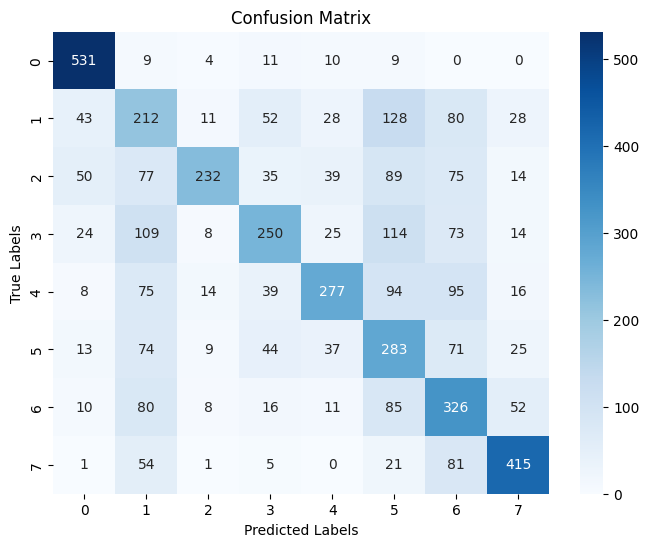

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()